Subperíodo crisis 80-90 tiene menos de 4 datos, omitiendo.


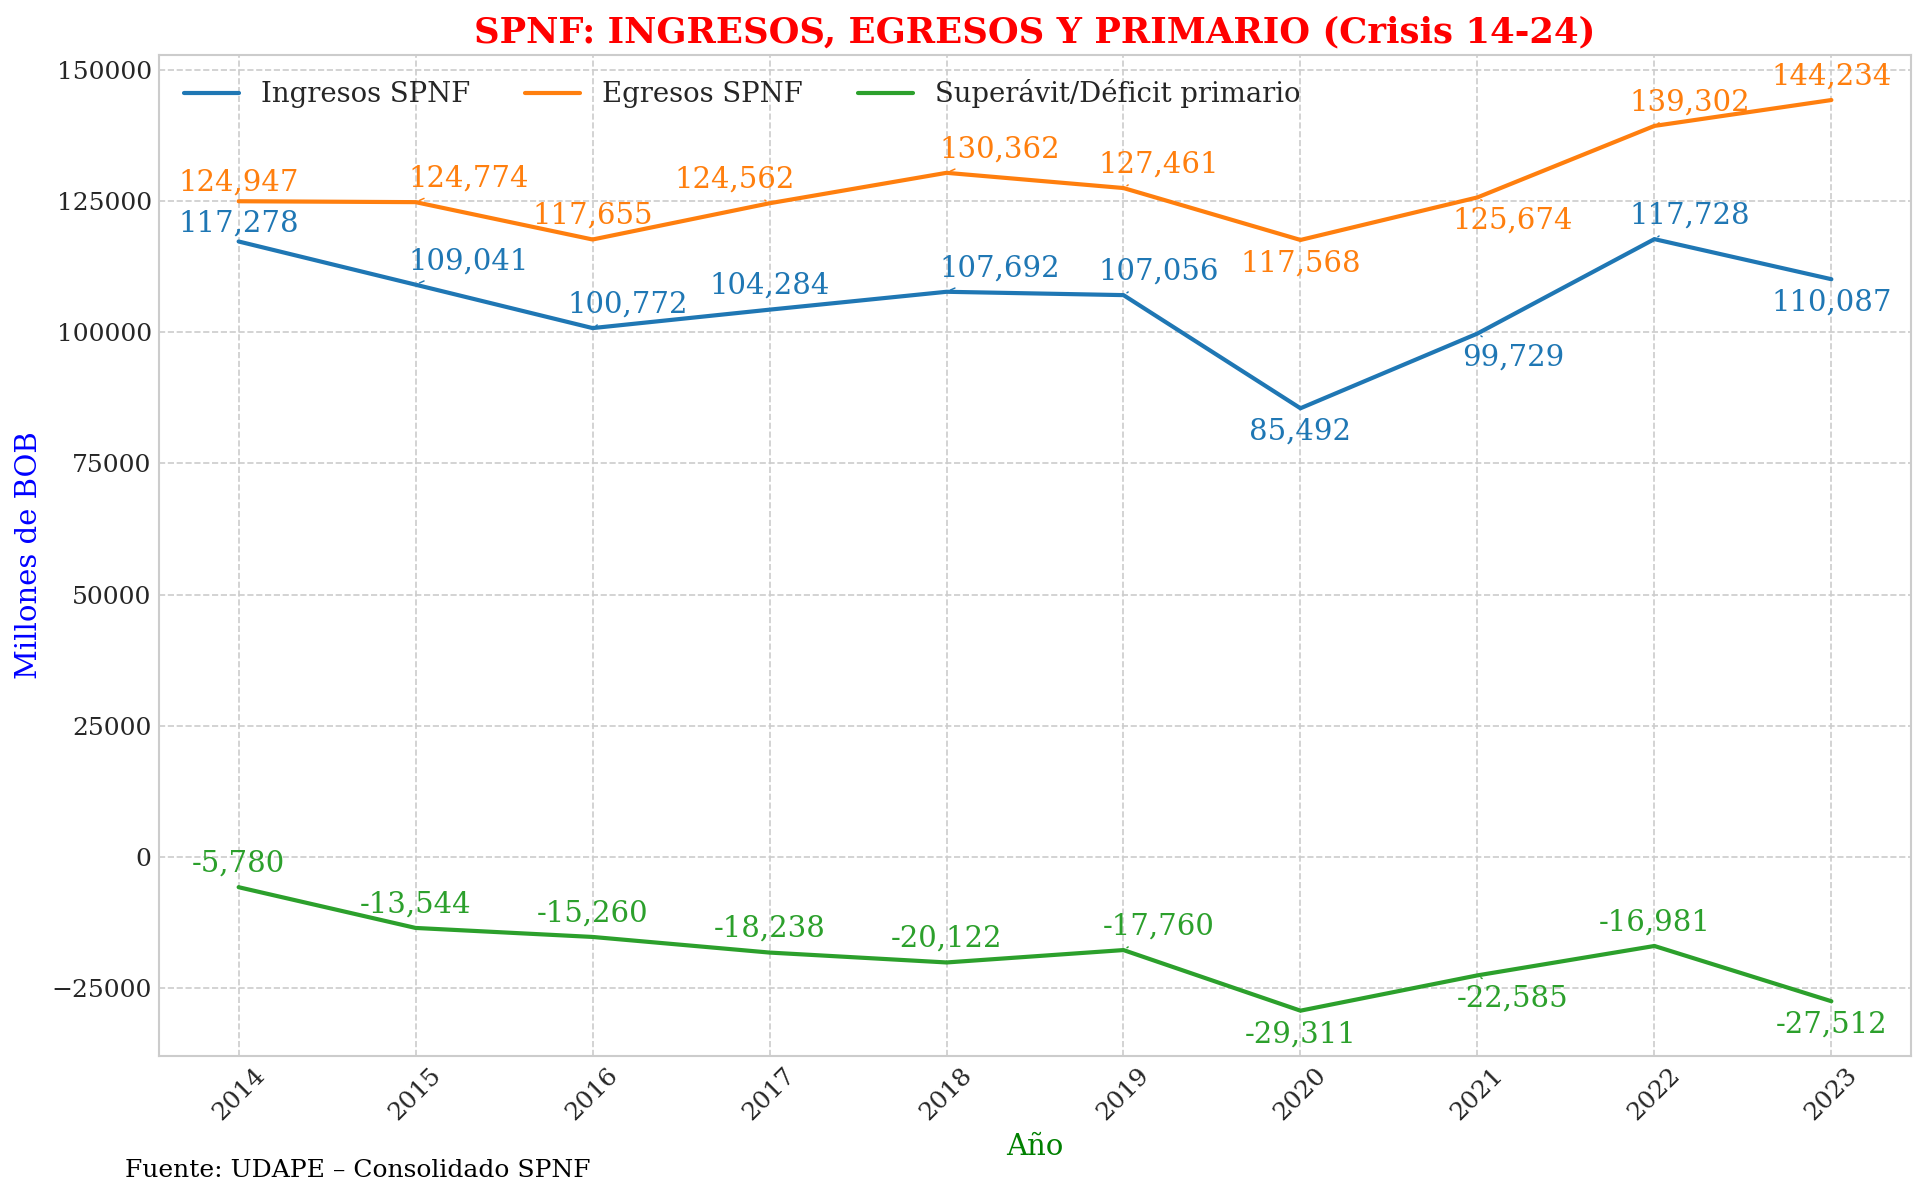

In [29]:
# ─────────────────────────────────────────────────────────────────────
# Importaciones
# ─────────────────────────────────────────────────────────────────────
import sys, os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

# Si aún no instalaste el paquete en editable, descomenta:
# sys.path.append(os.path.abspath('../'))

from func_auxiliares.graficos_utils import (
    get_df, set_style, init_base_plot,
    add_year_value_annotations
)
from func_auxiliares.config import DB_PATH, ASSETS_DIR, PERIODOS_PARA_CRISIS

# ─────────────────────────────────────────────────────────────────────
# Configuración general
# ─────────────────────────────────────────────────────────────────────
output_dir = ASSETS_DIR / "crisis" / "consolidado_spnf"
output_dir.mkdir(parents=True, exist_ok=True)

set_style()

# ─────────────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────────────
SQL = """
    SELECT
      año,
      ingresos_totales    AS ingresos,
      egresos_totales     AS egresos,
      sup_o_def_primario  AS sup_o_def_primario
    FROM consolidado_spnf
    ORDER BY año
"""
df = get_df(SQL, str(DB_PATH), index_col="año")

# ─────────────────────────────────────────────────────────────────────
# Componentes y parámetros de graficado
# ─────────────────────────────────────────────────────────────────────
componentes = [
    ("ingresos", "Ingresos SPNF"),
    ("egresos",  "Egresos SPNF"),
    ("sup_o_def_primario", "Superávit/Déficit primario")
]
cols_componentes = [col for col, _ in componentes]
colors = {
    "ingresos": "#1f77b4",           # azul
    "egresos":  "#ff7f0e",           # naranja
    "sup_o_def_primario": "#2ca02c"  # verde
}

# ─────────────────────────────────────────────────────────────────────
# Offsets y años extra para anotaciones
# ─────────────────────────────────────────────────────────────────────
# Ajusta estos valores tras la primera corrida para evitar solapamientos
annotation_offsets = {
    "ingresos": {
        2014: (0,  3500),  
        2015: (0.3,  4500),   
        2016: (0.2, 4500),   
        2017: (0,  4500),
        2018: (0.3,  4500),
        2019: (0.2,  4500),
        2020: (0, -4500), 
        2021: (0.2,  -4500),  
        2022: (0.2,  4500),
        2023: (0,  -4500),
        2024: (0,  -200),  
    },
    "egresos": {
        2014: (0,  3500),  
        2015: (0.3,  4500),   
        2016: (0, 4500),   
        2017: (-0.2,  4500),
        2018: (0.3,  4500),
        2019: (0.2,  4500),
        2020: (0, -4500), 
        2021: (0.2,  -4500),  
        2022: (0.2,  4500),
        2023: (0,  4540),
        2024: (0,  -4500),  
    },
    "sup_o_def_primario": {
        2014: (0,  4500),  
        2015: (0,  4500),   
        2016: (0, 4500),   
        2017: (0,  4500),
        2018: (0,  4500),
        2019: (0.2,  4500),
        2020: (0, -4500), 
        2021: (0.2,  -4500),  
        2022: (0,  4500),
        2023: (0,  -4540),
        2024: (0,  -200),  
    }
}

# ─────────────────────────────────────────────────────────────────────
# Generación de gráficas por subperíodo de crisis
# ─────────────────────────────────────────────────────────────────────
for nombre, (ini, fin) in PERIODOS_PARA_CRISIS.items():
    sub = df.loc[ini:fin]
    if sub.empty:
        continue
    if len(sub) < 4:
        print(f"Subperíodo {nombre} tiene menos de 4 datos, omitiendo.")
        continue

    years_to_annot = list(sub.index)

    fig, ax = init_base_plot(
        sub,
        series=componentes,
        colors=colors,
        title=f"SPNF: INGRESOS, EGRESOS Y PRIMARIO ({nombre})",
        xlabel="Año",
        ylabel="Millones de BOB",
        source_text="Fuente: UDAPE – Consolidado SPNF"
    )

    add_year_value_annotations(
        ax,
        sub,
        years_to_annot,
        cols_componentes,
        annotation_offsets,
        colors,
        arrow_lw=0.7
    )

    fig.savefig(output_dir / f"consolidado_spnf_{nombre}.png")
    plt.show()
    plt.close(fig)
